<a href="https://colab.research.google.com/github/shipleydm/IS8036_PROJECT/blob/main/IS8036.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Packages

In [3]:
 !pip install verstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 M

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.utils

import lightgbm as lgb
from lightgbm import LGBMModel
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import r2_score
# from sklearn.utils import parallel
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from verstack import LGBMTuner



import scipy
from scipy.sparse import hstack

from google.colab import drive

Bringing Data In

In [5]:
drive.mount('/content/drive')

dir = '/content/drive/My Drive/IS8036/AirBnB/DatCleanData'

# dir = '/content/drive/MyDrive/IS8036/AirBnB/DatCleanData'

listing_data=pd.read_csv(dir+'/CLEANLISTINGS.csv')
# review_data=pd.read_csv(dir+'/reviews.csv')
# neighborhood_data=pd.read_csv(dir+'/neighbourhoods.csv')

Mounted at /content/drive


In [6]:
listing_data.head(5)

,intListingID,strListingURL,boolInstantlyBookable,boolGuestProfilePicReqToBook,boolVerifiedGuestPhoneReqToBook,dtListingLastScraped,dtListingBookingCalendarLastScraped,dtListingFirstReview,intDaysSinceFirstReview,dtListingLastReview,...,boolHasAirConditioning,boolHasKitchen,boolHasHotWater,boolGuestPetsAllowed,boolHasTV,boolHasPool,boolHasHotTub,boolHasEVCharger,boolHasCable,boolHasInternet
0,10185917,https://www.airbnb.com/rooms/10185917,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1
1,10681596,https://www.airbnb.com/rooms/10681596,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,1,1
2,10886705,https://www.airbnb.com/rooms/10886705,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,1,1,0,0,1,1,0,0,0,1
3,11023946,https://www.airbnb.com/rooms/11023946,0,0,0,2020-05-30,2020-05-30,NaN,NaN,NaN,...,1,1,0,0,1,0,0,0,0,1
4,43160258,https://www.airbnb.com/rooms/43160258,1,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1


In [7]:
# review_data.head(5)

In [8]:
# neighborhood_data.head(5)

In [9]:
listing_data.dtypes

intListingID                        int64
strListingURL                      object
boolInstantlyBookable               int64
boolGuestProfilePicReqToBook        int64
boolVerifiedGuestPhoneReqToBook     int64
                                    ...  
boolHasPool                         int64
boolHasHotTub                       int64
boolHasEVCharger                    int64
boolHasCable                        int64
boolHasInternet                     int64
Length: 163, dtype: object

id

listing_url

scrape_id

last_scraped

name

summary

space

description

experiences_offered

neighborhood_overview

notes

transit

access

interaction

house_rules

thumbnail_url

medium_url

picture_url

xl_picture_url

host_id

host_url

host_name

host_since

host_location

host_about

host_response_time

host_response_rate

host_acceptance_rate

host_is_superhost

host_thumbnail_url

host_picture_url

host_neighbourhood

host_listings_count

host_total_listings_count

host_verifications

host_has_profile_pic

host_identity_verified

street

neighbourhood

neighbourhood_cleansed

neighbourhood_group_cleansed

city

state

zipcode

market

smart_location

country_code

country

latitude

longitude

is_location_exact

property_type

room_type

accommodates

bathrooms

bedrooms

beds

bed_type

amenities

square_feet

price

weekly_price

monthly_price

security_deposit

cleaning_fee

guests_included

extra_people

minimum_nights

maximum_nights

minimum_minimum_nights

maximum_minimum_nights

minimum_maximum_nights

maximum_maximum_nights

minimum_nights_avg_ntm

maximum_nights_avg_ntm

calendar_updated

has_availability

availability_30

availability_60

availability_90

availability_365

calendar_last_scraped

number_of_reviews

number_of_reviews_ltm

first_review

last_review

review_scores_rating

review_scores_accuracy

review_scores_cleanliness

review_scores_checkin

review_scores_communication

review_scores_location

review_scores_value

requires_license

license

jurisdiction_names

instant_bookable

is_business_travel_ready

cancellation_policy

require_guest_profile_picture

require_guest_phone_verification

calculated_host_listings_count

calculated_host_listings_count_entire_homes

calculated_host_listings_count_private_rooms

calculated_host_listings_count_shared_rooms

reviews_per_month

Cleaning/EDA/T-tests

Linear Regression

## Narrowing Down Predictors and Exploring

In [10]:
# reading the csv file using read_csv
# storing the data frame in variable called df
df = pd.read_csv(dir+'/KeepingColumns.csv', encoding="ISO-8859-1")
 
# creating a list of column names by
# calling the .columns
list_of_columns_to_keep = list(df.columns)
 
# displaying the list of column names
# print(list_of_columns_to_keep)

In [11]:
listing_df = listing_data.loc[:, list_of_columns_to_keep]
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Data columns (total 93 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   boolInstantlyBookable                        7221 non-null   int64  
 1   boolGuestProfilePicReqToBook                 7221 non-null   int64  
 2   boolVerifiedGuestPhoneReqToBook              7221 non-null   int64  
 3   intDaysSinceFirstReview                      5912 non-null   float64
 4   intDaysSinceLastReview                       5912 non-null   float64
 5   intDaysSinceLastBookingCalendarUpdate        7162 non-null   float64
 6   cintNeighborhood                             7221 non-null   int64  
 7   cintZipCode                                  7221 non-null   int64  
 8   cintPropertyType                             7221 non-null   int64  
 9   ointRoomType                                 7221 non-null   int64  
 10  

In [12]:
# Define the columns to drop and the target variable
# going ahead and removing this host info as well, not being used for predictors
remove_cols = ['strHostNeighborhood', 'strHostCity', 'strHostStateProv', 'strHostCountry']
for name in remove_cols:
  if name in list_of_columns_to_keep:
    list_of_columns_to_keep.remove(name)

# final dataset with columns kept
listing_df = listing_df.loc[:, list_of_columns_to_keep]

In [52]:
# model inputs
# predictors = list_of_columns_to_keep       
# target = 'intDailyPrice'

# Split the data into training and test sets
df = listing_df # keep copy of original dataframe without the predictor being dropped
df.drop('intDailyPrice', axis=1)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=41)

df_train.shape

# double check to bring in correct column types
col = df_train.select_dtypes(['float64', 'int', 'int64']).columns

Text(0.5, 1.0, 'Correlation matrix of numerical features')

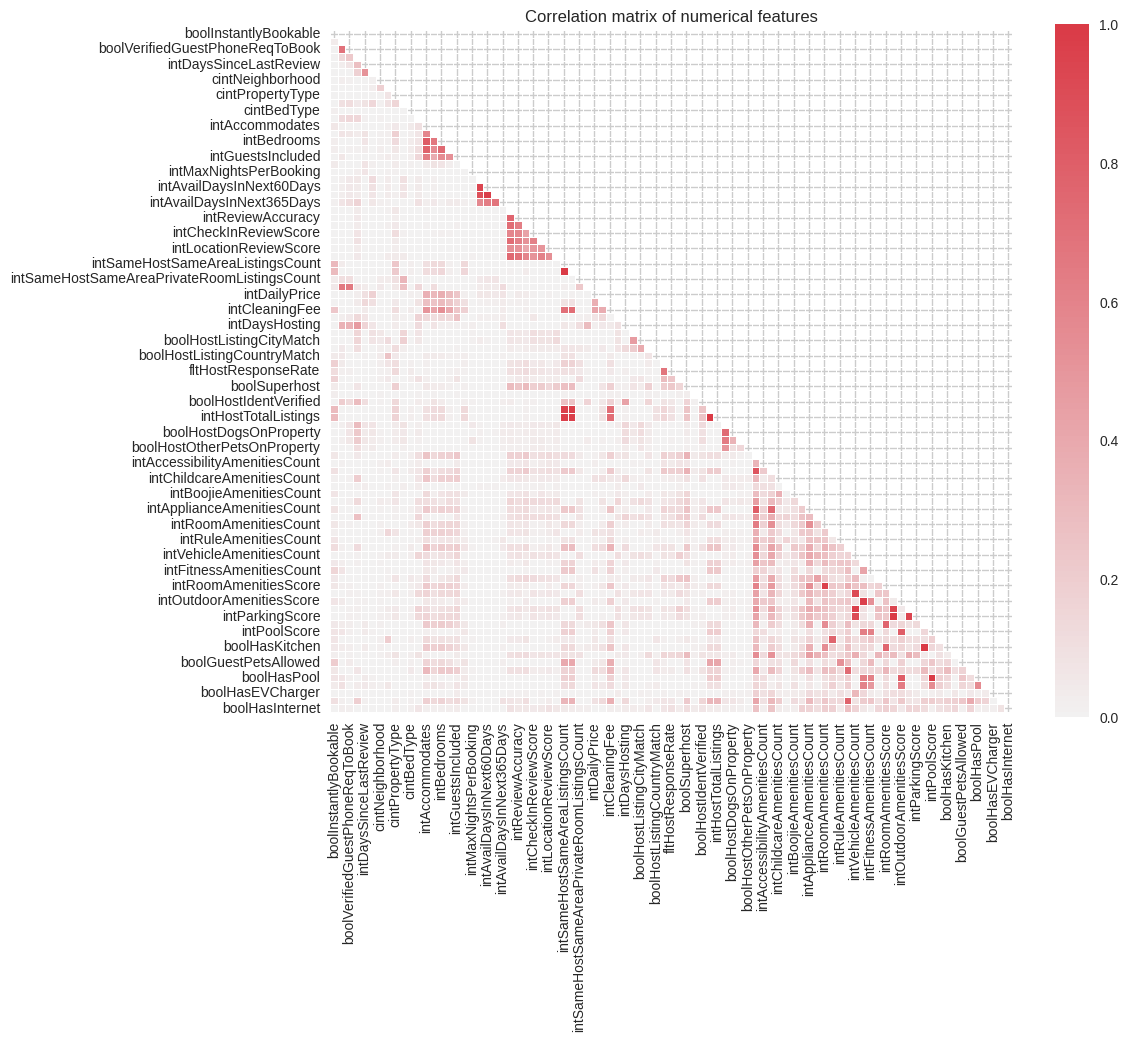

In [14]:
# correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmin=0, vmax=1.0, square=True, linewidths=.5, cbar_kws={"shrink": 1.0});
plt.title('Correlation matrix of numerical features')

In [73]:
# select upper traingle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of columns with correlation greater than cutoff
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
print(to_drop)
len(to_drop)
# drop the columns
# X.drop(X.columns[to_drop], axis=1)

['intBedrooms', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intSameHostSameAreaEntireHomeListingsCount', 'intHostListings', 'intHostTotalListings', 'intProvidedItemsAmenitiesCount', 'intApplianceAmenitiesCount', 'intRoomAmenitiesScore', 'intVehicleAmenitiesScore', 'intOutdoorAmenitiesScore', 'intParkingOptionsCount', 'intParkingScore', 'intPoolScore', 'boolHasKitchen', 'boolHasPool']


16

In [72]:
# correlated_features = set()
# correlation_matrix = corr
# for i in range(len(correlation_matrix .columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > 0.8:
#             colname = correlation_matrix.columns[i]
#             correlated_features.add(colname)

# print(correlated_features)
# len(correlated_features)

{'intBedrooms', 'intPoolScore', 'intOutdoorAmenitiesScore', 'boolHasPool', 'intParkingOptionsCount', 'boolHasKitchen', 'intHostListings', 'intRoomAmenitiesScore', 'intApplianceAmenitiesCount', 'intSameHostSameAreaEntireHomeListingsCount', 'intHostTotalListings', 'intVehicleAmenitiesScore', 'intParkingScore', 'intProvidedItemsAmenitiesCount', 'intAvailDaysInNext90Days', 'intAvailDaysInNext60Days'}


16

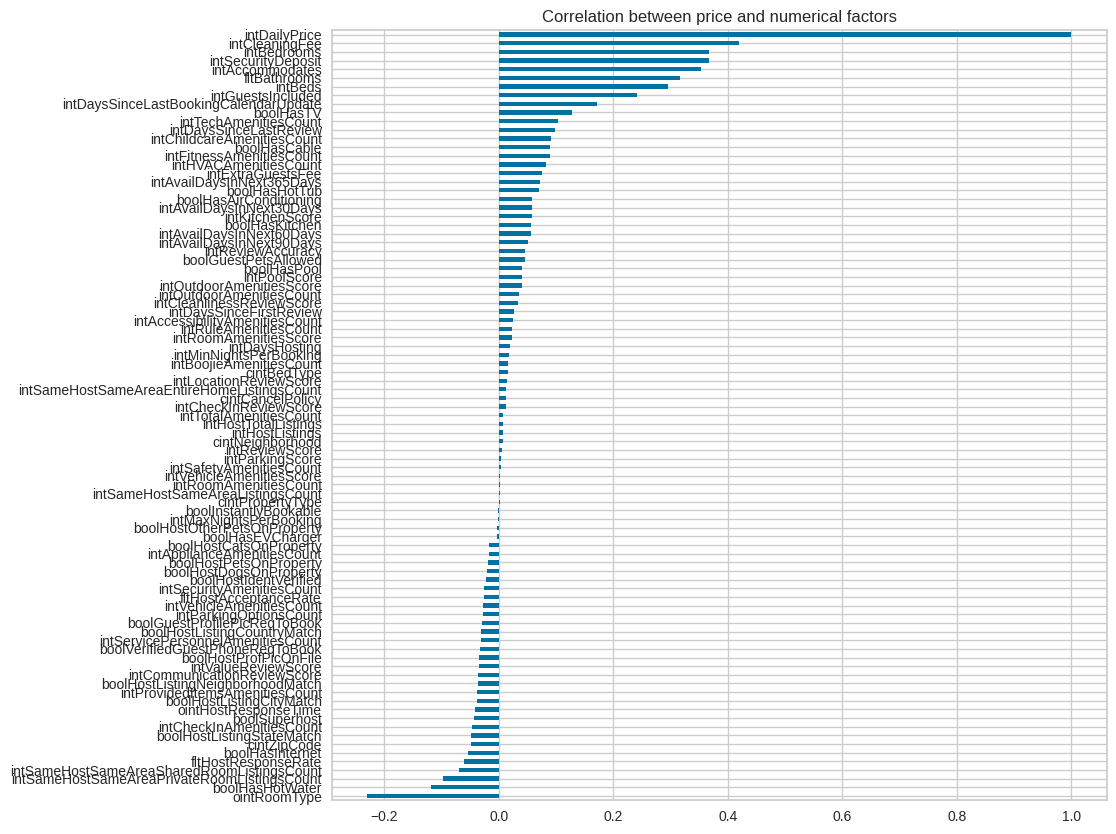

In [15]:
df_train[col].corr() ['intDailyPrice'].sort_values(ascending=True).dropna().plot(kind='barh', figsize=(10,10));
plt.title('Correlation between price and numerical factors');

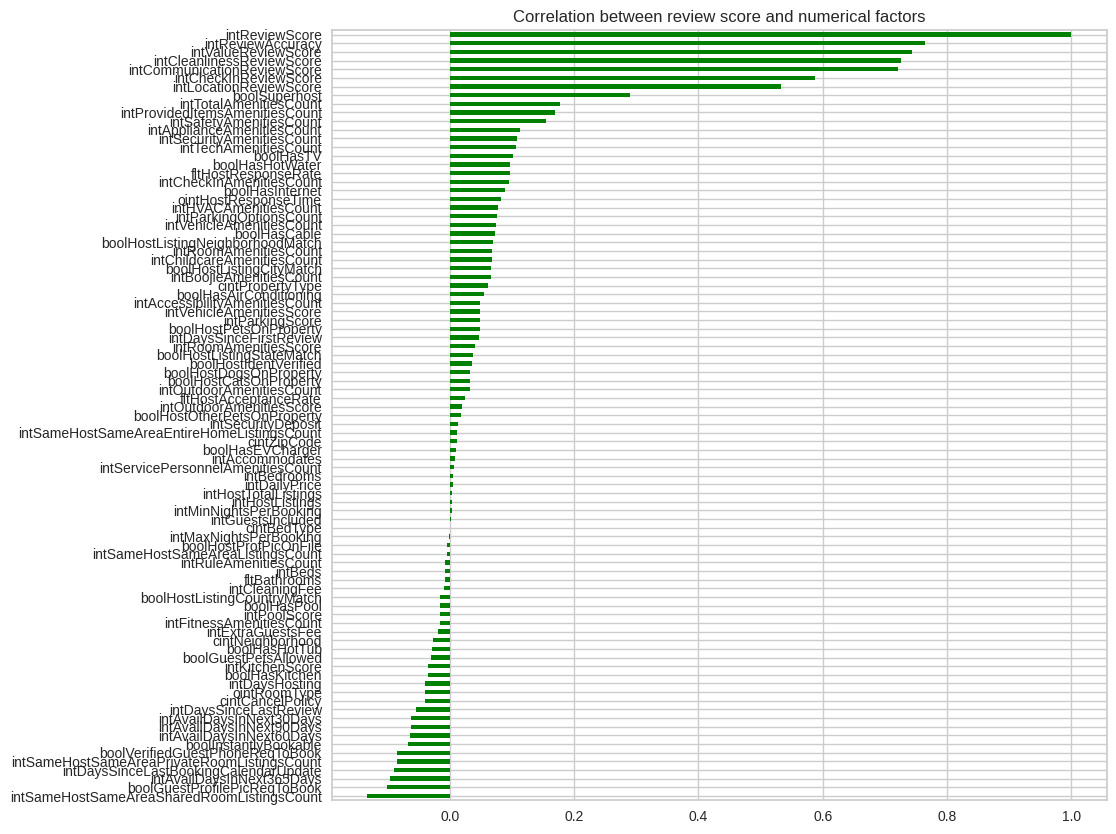

In [16]:
# below is just out of curiosity
df_train[col].corr() ['intReviewScore'].sort_values(ascending=True).dropna().plot(kind='barh', figsize=(10,10), color='green');
plt.title('Correlation between review score and numerical factors');

Drop highly correlated variables

In [75]:
# select upper traingle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of columns with correlation greater than cutoff
correlated_features = [column for column in upper.columns if any(upper[column] > 0.70)]
print(correlated_features)
len(correlated_features)

# drop the columns
df_train.drop(labels=correlated_features, axis=1, inplace=True)
df_test.drop(labels=correlated_features, axis=1, inplace=True)

['intBedrooms', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intSameHostSameAreaEntireHomeListingsCount', 'intHostListings', 'intHostTotalListings', 'intProvidedItemsAmenitiesCount', 'intApplianceAmenitiesCount', 'intRoomAmenitiesScore', 'intVehicleAmenitiesScore', 'intOutdoorAmenitiesScore', 'intParkingOptionsCount', 'intParkingScore', 'intPoolScore', 'boolHasKitchen', 'boolHasPool']


In [77]:
# double check to bring in correct column types
col = df_train.select_dtypes(['float64', 'int', 'int64']).columns

## Light GBM Model

In [17]:
def model_eval(X_train, y_train, X_test, y_test, model):
    '''
    input: X is features data frame, y is response, model
    output: train cross validation score, test score, predicted values
    
    '''
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 5)        # Array of R^2 scores of the estimator for each run of the cross validation.
    test_score = r2_score(y_test, y_pred)                                           # R^2 (coefficient of determination) regression score function.            
    return score, test_score, y_pred

def plot_features(X, model, name):
    '''
    plot features importance of algoritm
    input: dataframe X and regression model
    output: Feature importance plot
    '''
    print("Plot feature importances…")
    headers = ["name", "score"]
    values = sorted(zip(X.columns, model.feature_importances_), key=lambda x: x[1] * -1)
    forest_feature_importances = pd.DataFrame(values, columns = headers)
    forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)
    features = forest_feature_importances['name'][:25]
    y_pos = np.arange(len(features))
    scores = forest_feature_importances['score'][:25]
    #plot feature importances
    plt.figure(figsize=(13,8))
    plt.barh(y_pos, scores, align='center', alpha=0.5, color='red')
    plt.yticks(y_pos, features, rotation=0)   
    plt.ylabel('Features')
    plt.xlabel('Score')
    plt.title('Feature importances ' + name)
    plt.show()

In [78]:
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X = df_train[col]
X_test = df_test[col]
Y = df_train['intDailyPrice']
Y_test = df_test['intDailyPrice']

Number of columns is: 72
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHostListingNeighborhoodMatch', 'boolHostListingCityMatch', 'boolHostListingStateMatch', 'boolHostListingCountryMatch', '

In [79]:
model_lgb = lgb.LGBMRegressor(boosting_type ='gbdt', learning_rate = 0.1, num_leaves=31, max_depth =8) 
score, test_score, y_pred_lgbm = model_eval(X, Y, X_test, Y_test, model_lgb)

print('Number of columns is:', df_test.shape[1])
# print(df_test.columns)
print('\n')
print('LGBM Model:')
print('- Mean of crossvalidation scores:', np.mean(score))
print('- r2_score:', test_score)

Number of columns is: 73


LGBM Model:
- Mean of crossvalidation scores: 0.4585985452946876
- r2_score: 0.7512143261585542


LGBM Basic Tune

In [80]:
#
# Trying different model eval method
#
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 31,
    'metric': {'l2','l1'},
    'verbose': -1
}
 

# loading data
lgb_train = lgb.Dataset(X, Y)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=80)

[1]	valid_0's l2: 238079	valid_0's l1: 116.446
Training until validation scores don't improve for 80 rounds
[2]	valid_0's l2: 231152	valid_0's l1: 111.009
[3]	valid_0's l2: 225165	valid_0's l1: 105.996
[4]	valid_0's l2: 219273	valid_0's l1: 101.444
[5]	valid_0's l2: 213387	valid_0's l1: 97.3801
[6]	valid_0's l2: 208034	valid_0's l1: 93.6073
[7]	valid_0's l2: 202717	valid_0's l1: 90.5797
[8]	valid_0's l2: 198426	valid_0's l1: 88.1221
[9]	valid_0's l2: 195930	valid_0's l1: 86.389
[10]	valid_0's l2: 191965	valid_0's l1: 84.267
[11]	valid_0's l2: 188050	valid_0's l1: 82.1963
[12]	valid_0's l2: 184224	valid_0's l1: 80.7649
[13]	valid_0's l2: 180699	valid_0's l1: 79.2638
[14]	valid_0's l2: 177742	valid_0's l1: 78.2131
[15]	valid_0's l2: 174372	valid_0's l1: 77.0527
[16]	valid_0's l2: 171800	valid_0's l1: 76.519
[17]	valid_0's l2: 169277	valid_0's l1: 76.0405
[18]	valid_0's l2: 167035	valid_0's l1: 75.4347
[19]	valid_0's l2: 164471	valid_0's l1: 74.7767
[20]	valid_0's l2: 162412	valid_0's l1:

In [81]:
# prediction
gbm_train_preds = model.predict(X)
gbm_test_preds = model.predict(X_test)

# accuracy check
r2_train = r2_score(Y, gbm_train_preds)
mse_train = mean_squared_error(Y, gbm_train_preds)
rmse_train = mse_train**(0.5)
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2 = r2_score(Y_test, gbm_test_preds)
mse = mean_squared_error(Y_test, gbm_test_preds)
rmse = mse**(0.5)
print('Test data accuracy')
print("R2: %.4f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

Train data accuracy
R2: 0.8300
MSE: 15863.89
RMSE: 125.95
Test data accuracy
R2: 0.7457
MSE: 62622.06
RMSE: 250.24


LGBM Optuna


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 500 trials
     .. Evaluation metric: mse 
     .. Study direction: minimize mean_squared_error

     . Trial number: 0 finished
     .. Optimization score (lower-better): mean_squared_error: 44321.30166325925
     .. Evaluation score (lower-better): mse: 44321.30166325925
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): mean_squared_error: 30573.995136441663
     .. Evaluation score (lower-better): mse: 30573.995136441663
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): mean_squared_error: 36899.198611200074
     .. Evaluation score (lower-better): mse: 36899.198611200074
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): m

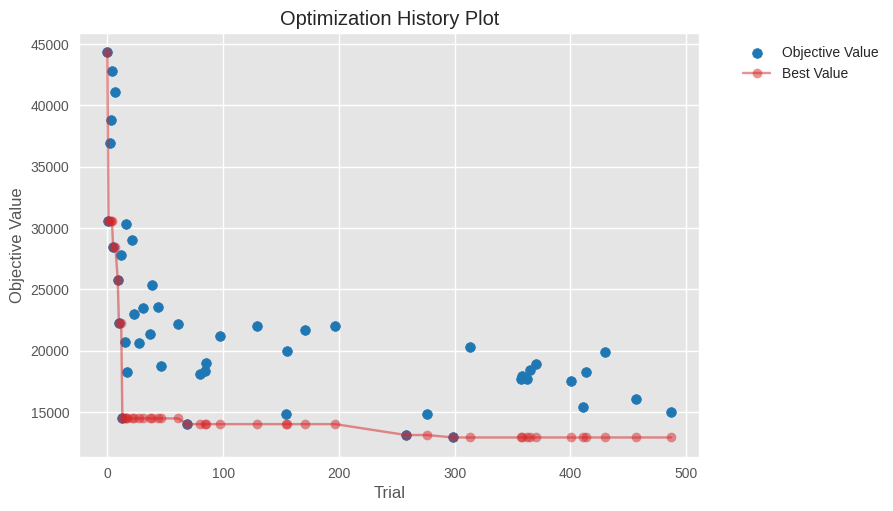

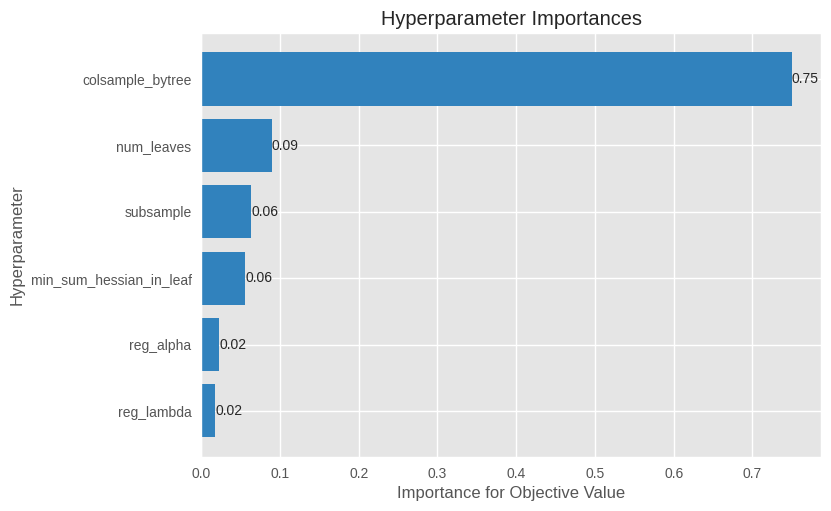

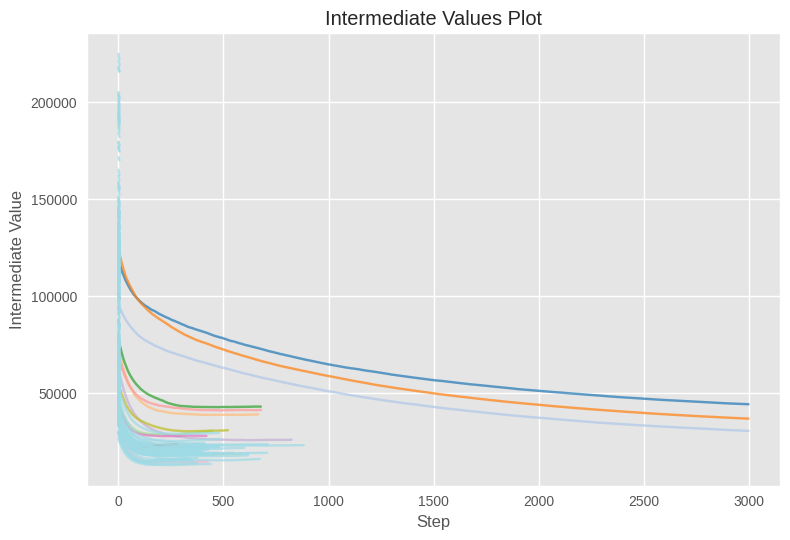

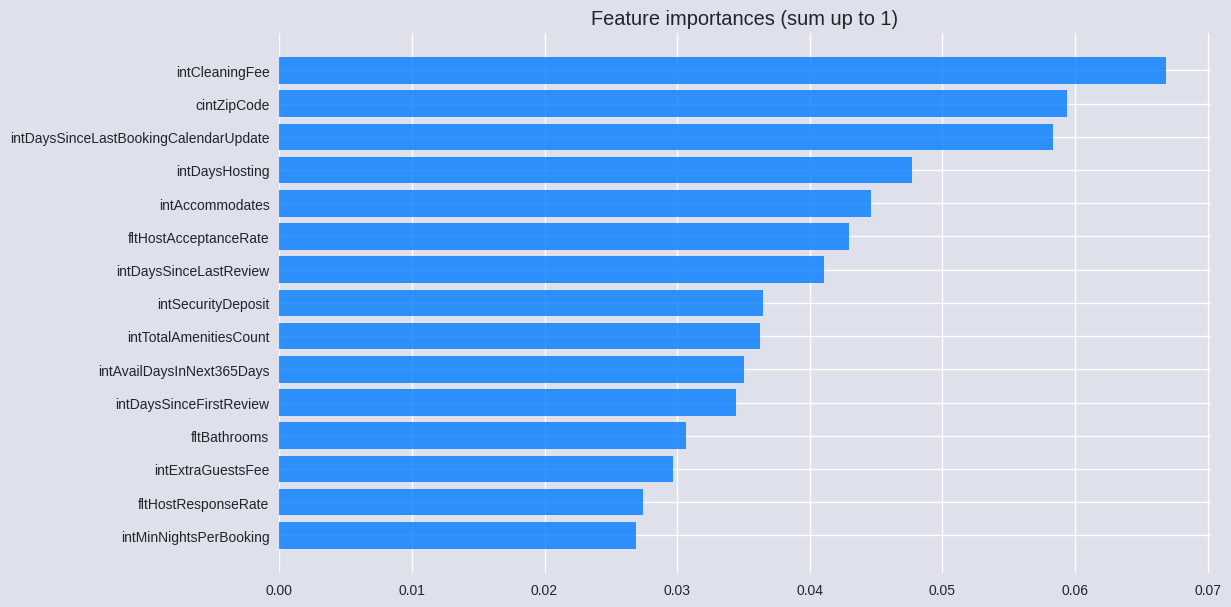


     . Optuna hyperparameters optimization finished
     .. Best trial number:299    |     mean_squared_error:           12925.340880474614
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  251   |     mse:           23734.782286431237

Time elapsed for fit execution: 12 min 12.185 sec


In [82]:
# tune the hyperparameters and fit the optimized model
tuner = LGBMTuner(metric = 'mse', trials = 500) # <- the only required argument
tuner.fit(X, Y)
# check the optimization log in the console.
# pred = tuner.predict(X_test)

In [84]:
# prediction
gbm_train_preds = tuner.predict(X)
gbm_test_preds = tuner.predict(X_test)

# accuracy check
r2_train = r2_score(Y, gbm_train_preds)
mse_train = mean_squared_error(Y, gbm_train_preds)
rmse_train = mse_train**(0.5)
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2 = r2_score(Y_test, gbm_test_preds)
mse = mean_squared_error(Y_test, gbm_test_preds)
rmse = mse**(0.5)
print('Test data accuracy')
print("R2: %.4f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

Train data accuracy
R2: 0.5610
MSE: 40966.73
RMSE: 202.40
Test data accuracy
R2: 0.3791
MSE: 152882.68
RMSE: 391.00


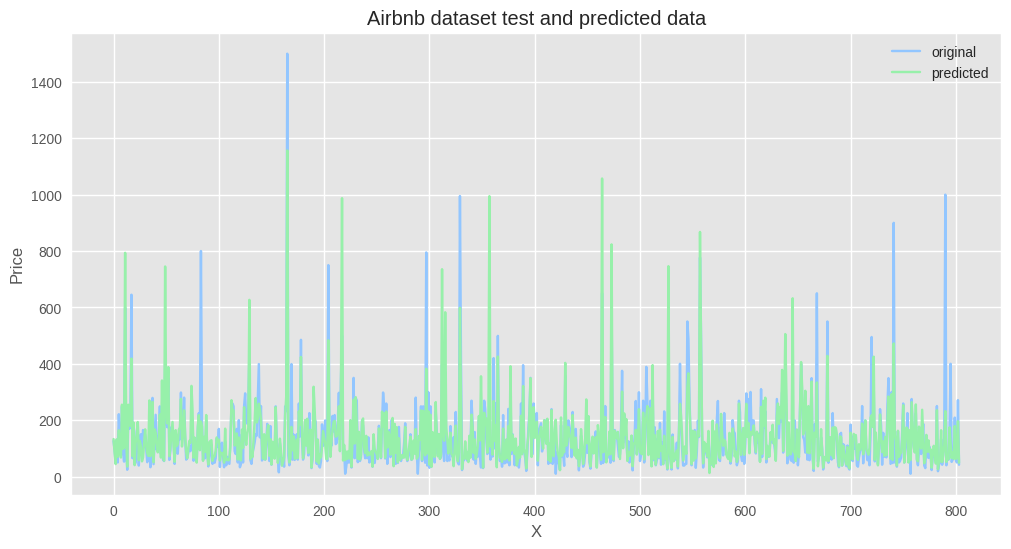

In [66]:
# visualizing in a plot
x_ax = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, gbm_test_preds, label="predicted")
plt.title("Airbnb dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

Plot feature importances…


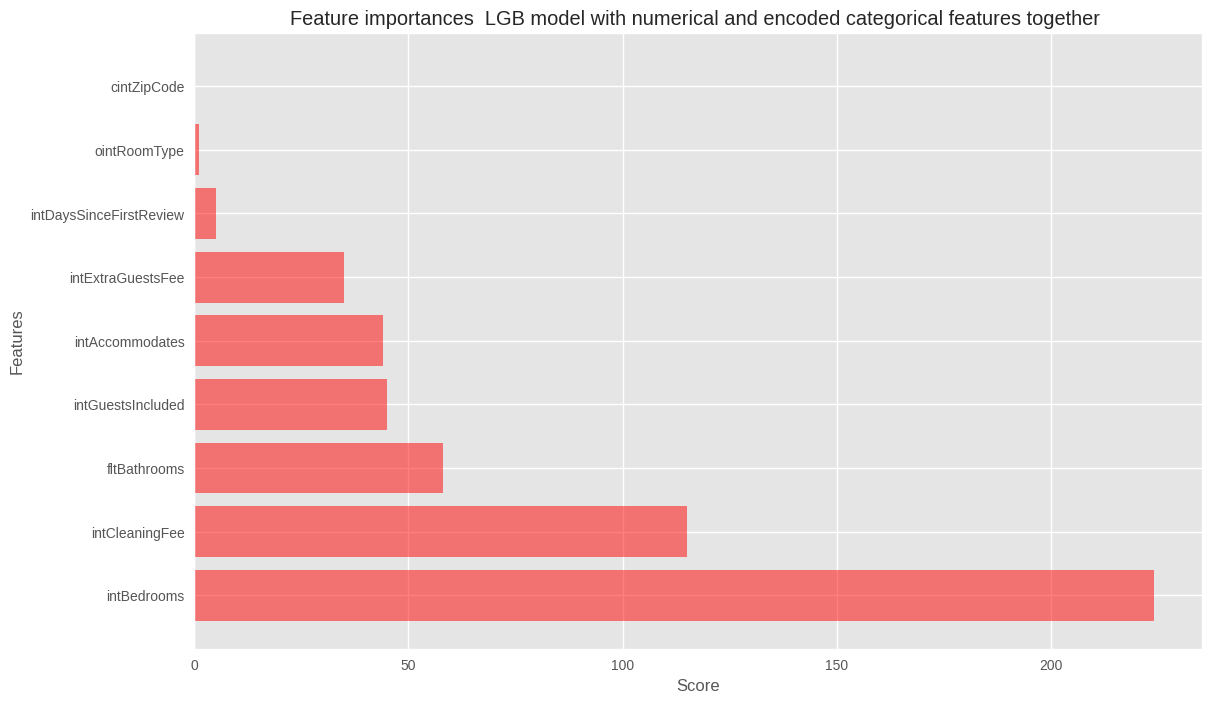

In [67]:
plot_features(X, model_lgb, " LGB model with numerical and encoded categorical features together ")

In [68]:
tuner.plot_importances(interactive = True)

Feature Importance Plot is saved to /content/FIM_DARK.html


## Random Forest Model

In [85]:
# drop nulls, can handle a different way if needed, but we don't have many nulls
df_train_rf = df_train.dropna()
df_test_rf = df_test.dropna()

In [86]:
# get data ready for model inputs
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X = df_train_rf[col]
X_test = df_test_rf[col]
Y = df_train_rf['intDailyPrice']
Y_test = df_test_rf['intDailyPrice']

Number of columns is: 72
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHostListingNeighborhoodMatch', 'boolHostListingCityMatch', 'boolHostListingStateMatch', 'boolHostListingCountryMatch', '

In [87]:
# model
rfm = RandomForestRegressor(n_estimators=30,                
                            #  criterion='mse' - mse is default. Options are: {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}
                            random_state=3, 
                            n_jobs=-1,
                            min_samples_leaf=3,
                            max_depth=5)
rfm.fit(X, Y)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=30,
                      n_jobs=-1, random_state=3)

In [88]:
# prediction
rfm_train_preds = rfm.predict(X)
rfm_test_preds = rfm.predict(X_test)

# accuracy check
r2_train = r2_score(Y, rfm_train_preds)
mse_train = mean_squared_error(rfm_train_preds, Y)
rmse_train = sqrt(mean_squared_error(rfm_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, rfm_test_preds)
mse_test = mean_squared_error(rfm_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(rfm_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Train data accuracy
R2: 0.7004
MSE: 8139.84
RMSE: 90.22
Test data accuracy
R2: 0.6420
MSE: 5962.24
RMSE: 77.22


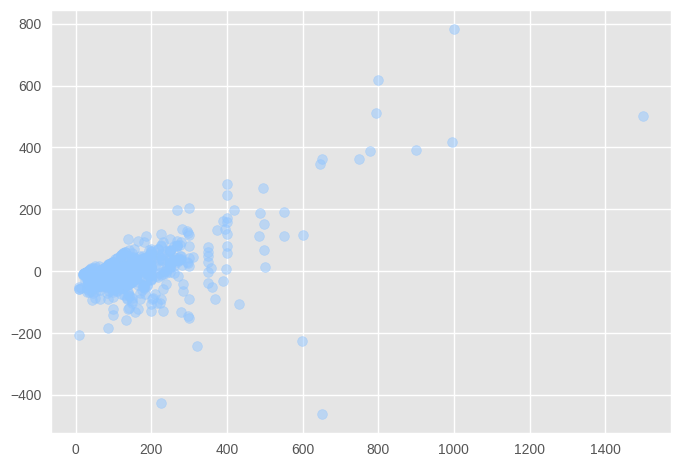

In [89]:
#Find Errors by calculating the difference between the actual and rpedicted values
Errors=Y_test-rfm_test_preds

#Scatter plot between the Actual values and Error term
plt.scatter(Y_test, Errors, alpha=0.5)

Plot feature importances…


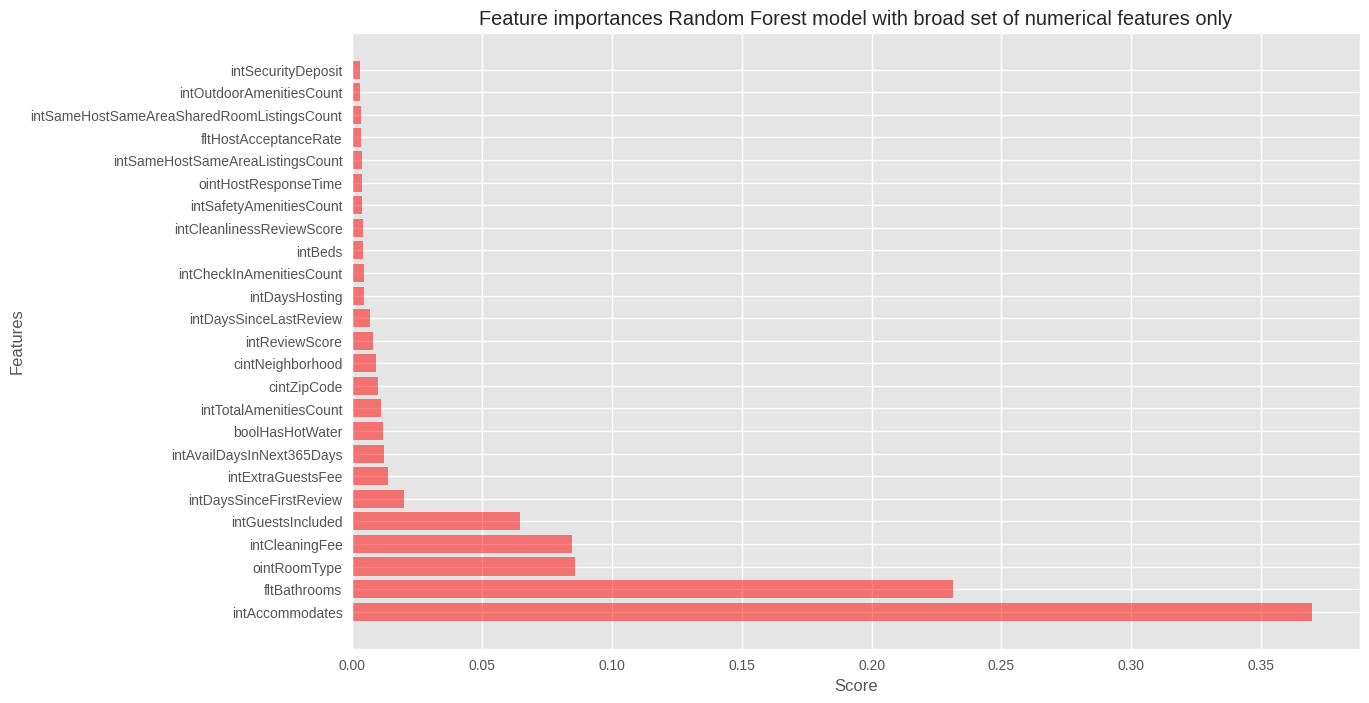

In [90]:
plot_features(X, rfm, "Random Forest model with broad set of numerical features only")

In [92]:
#remove lowest importance values and some of highly correlated, until we have the best result at the end
exc=  ['intAccommodates', 'ointRoomType', 'intCleaningFee', 'fltBathrooms','intGuestsIncluded', 'intDaysSinceFirstReview']

col1 = [i for i in col if i in exc]
print('Number of columns is:', len(col1))
print(col1)
X = df_train_rf[col1]
X_test = df_test_rf[col1]

# model - reduced
rfm_r = RandomForestRegressor(n_estimators=30,                
                            #  criterion='mse' - mse is default. Options are: {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}
                            random_state=3, 
                            n_jobs=-1,
                            min_samples_leaf=3,
                            max_depth=5)
rfm_r.fit(X, Y)

Number of columns is: 6
['intDaysSinceFirstReview', 'ointRoomType', 'intAccommodates', 'fltBathrooms', 'intGuestsIncluded', 'intCleaningFee']


RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=30,
                      n_jobs=-1, random_state=3)

In [93]:
# prediction
rfm_train_preds = rfm_r.predict(X)
rfm_test_preds = rfm_r.predict(X_test)

# accuracy check
r2_train = r2_score(Y, rfm_train_preds)
mse_train = mean_squared_error(rfm_train_preds, Y)
rmse_train = sqrt(mean_squared_error(rfm_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, rfm_test_preds)
mse_test = mean_squared_error(rfm_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(rfm_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Train data accuracy
R2: 0.6578
MSE: 9297.84
RMSE: 96.43
Test data accuracy
R2: 0.6180
MSE: 6361.42
RMSE: 79.76


RF with Grid Search

In [61]:
num_estimators = np.arange(1,10)
depths = np.arange(1,10)
num_leafs = np.arange(1,10)
max_features = ['auto', 'log2', 'sqrt']
rf_parameters = [{
                 'n_estimators': num_estimators,
                 'max_depth' : depths,
                 'min_samples_leaf' : num_leafs,
                 'max_features' : max_features}]

rf_gs = GridSearchCV(RandomForestRegressor(), rf_parameters, scoring = 'neg_mean_absolute_error', cv = 3)
rf_gs.fit(X,Y)

rf_gs.best_score_ 
rf_gs.best_estimator_


# RandomForestRegressor
# RandomForestRegressor(max_depth=8, max_features='auto', min_samples_leaf=8,
#                       n_estimators=9)

RandomForestRegressor(max_depth=9, max_features='log2', min_samples_leaf=4,
                      n_estimators=8)

In [62]:
# prediction
rfm_train_preds = rf_gs.predict(X)
rfm_test_preds = rf_gs.predict(X_test)

# accuracy check
r2_train = r2_score(Y, rfm_train_preds)
mse_train = mean_squared_error(rfm_train_preds, Y)
rmse_train = sqrt(mean_squared_error(rfm_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, rfm_test_preds)
mse_test = mean_squared_error(rfm_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(rfm_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Train data accuracy
R2: 0.7119
MSE: 7784.67
RMSE: 88.23
Test data accuracy
R2: 0.6089
MSE: 6513.19
RMSE: 80.70


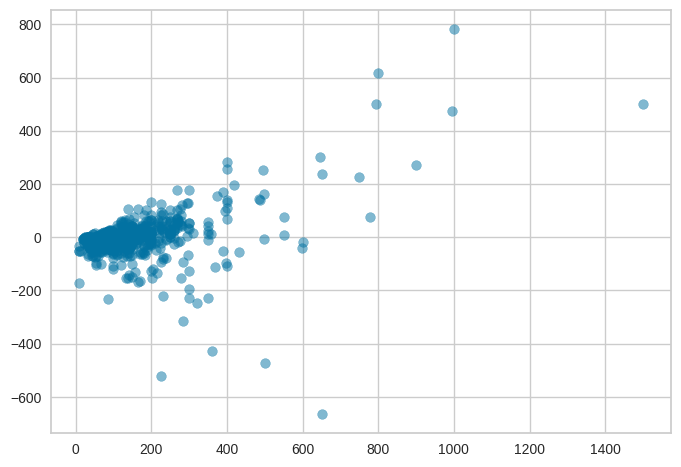

In [63]:
#Find Errors by calculating the difference between the actual and rpedicted values
Errors=Y_test-rfm_test_preds

#Scatter plot between the Actual values and Error term
plt.scatter(Y_test, Errors, alpha=0.5)

## KNN 

In [94]:
# Handle nulls
# drop nulls, can handle a different way if needed, but we don't have many nulls
df_train_knn = df_train.dropna()
df_test_knn = df_test.dropna()
# df_train_knn = df_train
# df_test_knn = df_test
  

In [ ]:
# impute missing values in X_train and X_test with respective column median in X_train
# for df1 in [df_train_knn, df_test_knn]:
#     for column in df_train_knn.columns:
#         col_median=df_train_knn[column].median()
#         df1[column].fillna(col_median, inplace=True) 

In [95]:
# get data ready for model inputs
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)


# standardize the data
scaler = StandardScaler()

X = scaler.fit_transform(df_train_knn[col])
X_test = scaler.transform(df_test_knn[col])
Y = df_train_knn['intDailyPrice']
Y_test = df_test_knn['intDailyPrice']

Number of columns is: 72
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHostListingNeighborhoodMatch', 'boolHostListingCityMatch', 'boolHostListingStateMatch', 'boolHostListingCountryMatch', '

In [96]:
# Begin with a trial value for K around 3
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X,Y)
pred=knn.predict(X_test)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f1ebb720820>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.9/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so: cannot open shared 

In [97]:
# prediction
knn_train_preds = knn.predict(X)
knn_test_preds = knn.predict(X_test)

# accuracy check
r2_train = r2_score(Y, knn_train_preds)
mse_train = mean_squared_error(knn_train_preds, Y)
rmse_train = sqrt(mean_squared_error(knn_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, knn_test_preds)
mse_test = mean_squared_error(knn_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(knn_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Train data accuracy
R2: 0.7247
MSE: 7481.46
RMSE: 86.50
Test data accuracy
R2: 0.5331
MSE: 7775.76
RMSE: 88.18


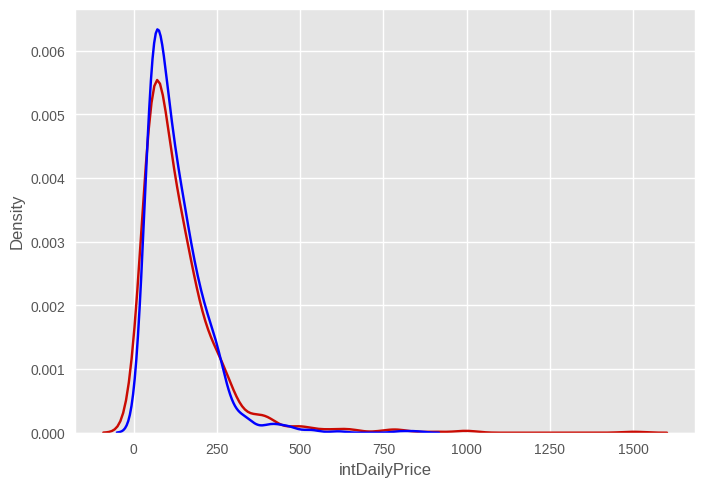

In [98]:
# Plotting the distribution plot
ax1=sns.distplot(Y_test,hist=False,color='r',label='actual value')
ax2=sns.distplot(pred,hist=False,color='blue',label='predicted value')

In [ ]:
# Calculate RMSE for finding the optimal value of K
rmse=list()
rmse1=list()
new=list()
mylist=list(range(50))
mylist=list(filter(lambda x:x%2!=0,mylist))
for k in mylist:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X,Y)
    pred=knn.predict(X_test)
    pred1=knn.predict(X)
    error=sqrt(mean_squared_error(Y_test,pred)) 
    error1=sqrt(mean_squared_error(Y,pred1))
    rmse.append(error)
    new.append([error,k])
    rmse1.append(error1)
    print('RMSE test value for k= ' , k , 'is:', error, '\nRMSE train value for k is = ',error1)

In [ ]:
# Creating a list of RMSE values
newList=list()
for x in mylist:
    newList.append(1/x)

In [ ]:
# Finding the minimum RMSE for testing data,which is optimal K value
Rmsetest=min(new)
print("Minimum R squared test error=",Rmsetest[0])
Rmsetrain=min(rmse1)
print("Minimum R squared train error=",Rmsetrain)
print("Optimal K value= ",Rmsetest[1])

In [ ]:
# Plot graph between RMSE value and K value
plt.plot(mylist,rmse,color='red')
plt.plot(mylist,rmse1,color='blue')
plt.xlabel('Neighbors Of K')
plt.ylabel('R squared test error')

In [ ]:
# find R2 with optimal K
knn_optimal=KNeighborsRegressor(n_neighbors=15)
knn_optimal.fit(X,Y)

In [ ]:
# prediction
knn_train_preds = knn_optimal.predict(X)
knn_test_preds = knn_optimal.predict(X_test)

# accuracy check
r2_train = r2_score(Y, knn_train_preds)
mse_train = mean_squared_error(knn_train_preds, Y)
rmse_train = sqrt(mean_squared_error(knn_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, knn_test_preds)
mse_test = mean_squared_error(knn_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(knn_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Extreme Gradient Boosting

In [ ]:
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X_train_df = df_train[col]
X_test_df = df_test[col]
Y_train_label = df_train['intDailyPrice']
Y_test_label = df_test['intDailyPrice']

dtrain = xgb.DMatrix(X_train_df, label=Y_train_label)
dtest = xgb.DMatrix(X_test_df, label=Y_test_label)

In [ ]:
# Parameter dictionary specifying base learner
param = [('max_depth', 4), ('objective', 'reg:squarederror'), ('eval_metric', 'rmse'), ('eval_metric', 'mae'), ('eval_metric', 'mape'),
         ('early_stopping_rounds', 50)]

num_round = 500
watchlist = [(dtrain,'train'), (dtest,'eval')]

evals_result = {}
bst = xgb.train(param, dtrain, num_round, watchlist, evals_result=evals_result)

print('Access RMSE metric directly from evals_result:')
print(evals_result['eval']['rmse'])

print('Access MAE metric directly from evals_result:')
print(evals_result['eval']['mae'])

print('Access MAPE metric directly from evals_result:')
print(evals_result['eval']['mape'])

# Instantiate an XGBoost object with hyperparameters
param = [('max_depth', 4), ('objective', 'reg:squarederror'), ('eval_metric', 'rmse'), ('eval_metric', 'mae'), ('eval_metric', 'mape'),
         ('early_stopping_rounds', 50),('learning_rate', 0.1),('n_jobs',4),('booster','gbtree')]

num_round = 500
watchlist = [(dtrain,'train'), (dtest,'eval')]

evals_result = {}

In [ ]:

xgb_reg = xgb.XGBRegressor(max_depth=2, n_estimators=50000, n_jobs=4,
                           objectvie='reg:squarederror', verbosity = 0,silent=True,
                           booster='gbtree', random_state=42, learning_rate=0.001)

# Train the model with train data sets
xgb_reg.fit(X_train_df, Y_train_label,
            eval_set=[(X_train_df, Y_train_label), (X_test_df, Y_test_label)],
            early_stopping_rounds=100, verbose=0)

y_train_pred = xgb_reg.predict(X_train_df) # Predictions
y_train_true = Y_train_label # True values

Train_MSE = mean_squared_error(y_train_true, y_train_pred)
Train_RMSE = np.sqrt(Train_MSE)

Train_R_squared = r2_score(y_train_true, y_train_pred)

print("\nIn Sample RMSE: ", np.round(Train_RMSE, 2))
print()
print("In Sample R-Squared: ", np.round(Train_R_squared, 2))

y_test_pred = xgb_reg.predict(X_test_df) # Predictions
y_test_true = Y_test_label # True values

Test_MSE = mean_squared_error(y_test_true, y_test_pred)
Test_RMSE = np.sqrt(Test_MSE)

Test_R_squared = r2_score(y_test_true, y_test_pred)

print("\nOut of Sample RMSE: ", np.round(Test_RMSE, 2))
print()
print("Out of Sample R-Squared: ", np.round(Test_R_squared, 2))

# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xgb_reg, X_train_df, Y_train_label, X_test_df, Y_test_label))

# Making the Residuals Plot
print("\nResiduals Plot")
print(residuals_plot(xgb_reg, X_train_df, Y_train_label, X_test_df, Y_test_label))


In [ ]:
results = xgb_reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [ ]:
xgb2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=0.6, colsample_bytree=0.2, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.001, max_delta_step=0, max_depth=14,
             min_child_weight=14, monotone_constraints='()',
             n_estimators=100000, n_jobs=36, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Train the model with train data sets
xgb2.fit(X_train_df, Y_train_label,
            eval_set=[(X_train_df, Y_train_label), (X_test_df, Y_test_label)],
            early_stopping_rounds=1000, verbose=1000)

y_train_pred = xgb2.predict(X_train_df) # Predictions
y_train_true = Y_train_label # True values

Train_MSE = mean_squared_error(y_train_true, y_train_pred)
Train_RMSE = np.sqrt(Train_MSE)

Train_R_squared = r2_score(y_train_true, y_train_pred)

print("\nIn Sample RMSE: ", np.round(Train_RMSE, 2))
print()
print("In Sample R-Squared: ", np.round(Train_R_squared, 2))

y_test_pred = xgb2.predict(X_test_df) # Predictions
y_test_true = Y_test_label # True values

Test_MSE = mean_squared_error(y_test_true, y_test_pred)
Test_RMSE = np.sqrt(Test_MSE)

Test_R_squared = r2_score(y_test_true, y_test_pred)

print("\nOut of Sample RMSE: ", np.round(Test_RMSE, 2))
print()
print("Out of Sample R-Squared: ", np.round(Test_R_squared, 2))

In [ ]:
results = xgb2.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

print(xgb2.best_ntree_limit)